In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
df=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [2]:
data=pd.read_excel('EastWestAirlines.xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.drop('ID#',axis=1,inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3994,False
3995,False
3996,False
3997,False


In [7]:
data[data.duplicated()]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
data.drop_duplicates(inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
data.reset_index(drop=True,inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
data.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [11]:
east_df=data.copy()
east_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


#DBSCAN


In [12]:
df=data.values
df

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [13]:
stscaner=StandardScaler().fit(df)
x=stscaner.transform(df)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [14]:
stscaner2=StandardScaler()
x=stscaner2.fit_transform(df)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [15]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1)

In [16]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
data['Cluster']=pd.DataFrame(dbscan.labels_)
data[0:5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [18]:
data[data['Cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
32,276571,0,4,1,1,42044,23,0,0,7872,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3910,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3916,130748,0,4,1,1,65510,37,6349,7,1545,0,-1
3933,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3960,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [19]:
data['Cluster'].value_counts()

,count
Cluster,
0,2318
1,1093
-1,554
2,13
5,9
3,6
4,5


In [20]:
(len(data[data['Cluster']==-1])/len(data))*100

13.856928464232116

In [21]:
X=metrics.silhouette_score(x,dbscan.labels_)
X

0.1983550327862541

In [22]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    X=ss.fit_transform(X)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

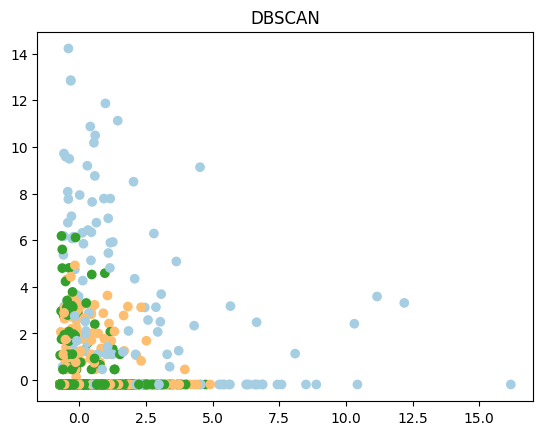

In [23]:
dbscan(df,2,8)

#K_MEANS

In [24]:
from sklearn.cluster import KMeans

In [25]:
east=east_df.copy()
east

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
def norm_func(i):
  x = (i-i.mean())/(i.std())
  return (x)

x = norm_func(east.iloc[:, 1:])
x

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769635,-0.098242,-0.062767,-0.702832,-1.104292,-0.328608,-0.362174,1.395060,-0.766976
1,-0.186299,-0.769635,-0.098242,-0.062767,-0.701135,-1.000161,-0.328608,-0.362174,1.379564,-0.766976
2,-0.186299,-0.769635,-0.098242,-0.062767,-0.539329,-0.791898,-0.328608,-0.362174,1.411525,-0.766976
3,-0.186299,-0.769635,-0.098242,-0.062767,-0.689335,-1.104292,-0.328608,-0.362174,1.371816,-0.766976
4,-0.186299,1.409030,-0.098242,-0.062767,1.082741,1.498991,1.154577,0.692238,1.363583,1.303496
...,...,...,...,...,...,...,...,...,...,...
3993,-0.186299,-0.769635,-0.098242,-0.062767,-0.357071,-0.791898,-0.185788,-0.098571,-1.315341,1.303496
3994,-0.186299,-0.769635,-0.098242,-0.062767,-0.669420,-0.687767,-0.328608,-0.362174,-1.319216,1.303496
3995,-0.186299,0.682808,-0.098242,-0.062767,0.343562,-0.375373,-0.328608,-0.362174,-1.315826,1.303496
3996,-0.186299,-0.769635,-0.098242,-0.062767,-0.689335,-1.104292,0.028442,-0.098571,-1.316310,-0.766976


In [27]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_east_df = scaler.fit_transform(east.iloc[:,1:])

scaled_east_df

array([[-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.39523468, -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.37973643, -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
         1.41170157, -0.76707163],
       ...,
       [-0.18632279,  0.68289387, -0.09825429, ..., -0.3622191 ,
        -1.31599028,  1.30365921],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.09858321,
        -1.3164746 , -0.76707163],
       [-0.18632279, -0.76973166, -0.09825429, ..., -0.3622191 ,
        -1.31792757, -0.76707163]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[39970.00000000004, 31979.483671264526, 27502.353142499538, 23762.19461962214, 21135.43289973403, 18676.30772292249, 15543.952062416878, 13955.72403432876, 12699.599060195886, 11715.374199822825]


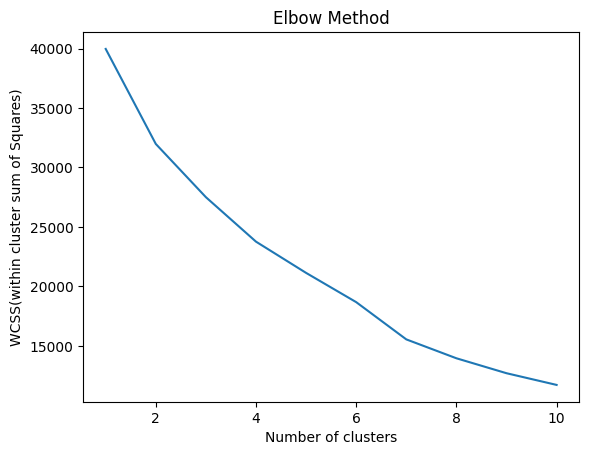

In [28]:
#wcss(within cluster sum of squares)
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum of Squares)')
plt.show()

In [29]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(8, random_state=0)
clusters_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=0)

In [30]:

clusters_new.labels_
#Assign clusters to the data set
east['clusterid_new'] = clusters_new.labels_
east


#These are standardized values.
clusters_new.cluster_centers_

array([[-6.11392536e-02, -2.62600447e-01, -9.82420026e-02,
        -6.27666088e-02, -2.65821355e-01, -1.05893606e-01,
        -1.80220834e-02, -1.10227556e-02,  9.76039664e-02,
         1.30349616e+00],
       [-1.44321077e-01, -5.71234555e-01, -9.82420026e-02,
        -6.27666088e-02, -5.17764240e-01, -4.99811584e-01,
        -2.24223418e-01, -2.47357063e-01, -9.80154251e-01,
        -7.66975693e-01],
       [-9.37556351e-02,  1.59081196e+00, -9.82420026e-02,
        -5.00113338e-02,  1.40366846e+00,  8.93006360e-01,
        -4.93557186e-02, -4.80168925e-02,  3.78499534e-01,
         5.40283624e-01],
       [-1.56243791e-01, -6.68302098e-01,  9.03597954e+00,
        -6.27666088e-02, -1.01823862e-01,  6.17507239e-01,
         8.74465129e-02,  2.20204749e-01, -7.27647978e-02,
         5.15829483e-02],
       [ 7.09808547e+00,  9.40267322e-03, -9.82420026e-02,
        -6.27666088e-02,  1.09933137e-01,  9.79513563e-02,
         3.59095937e-01,  3.99878284e-01, -8.16237815e-02,
         3.

In [31]:
east['clusterid_new']=east['clusterid_new'].replace(0, 'Cluster 1')
east['clusterid_new']=east['clusterid_new'].replace(1, 'Cluster 2')
east['clusterid_new']=east['clusterid_new'].replace(2, 'Cluster 3')
east['clusterid_new']=east['clusterid_new'].replace(3, 'Cluster 4')
east['clusterid_new']=east['clusterid_new'].replace(4, 'Cluster 5')
east['clusterid_new']=east['clusterid_new'].replace(5, 'Cluster 6')
east['clusterid_new']=east['clusterid_new'].replace(6, 'Cluster 7')
east['clusterid_new']=east['clusterid_new'].replace(7, 'Cluster 8')
east

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 7
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 7
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 7
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 7
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 1
3994,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 1
3995,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 1
3996,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2


In [32]:
east.groupby('clusterid_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,
Cluster 1,69248.065534,96.961165,1.696602,1.000000,1.000000,10708.651699,10.580097,435.461165,1.333738,4317.609223,1.000000
Cluster 2,36386.713051,32.677615,1.270527,1.000000,1.000000,4609.455488,6.779602,143.293863,0.429559,2085.678479,0.000000
Cluster 3,129202.536070,71.517413,4.248756,1.000000,1.002488,51021.782338,20.176617,390.568408,1.190299,4903.284826,0.631841
Cluster 4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
Cluster 5,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
Cluster 6,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
Cluster 7,60707.400409,32.602656,1.488253,1.000000,1.001021,6136.019408,8.329928,171.129724,0.512768,5659.396323,0.000000
Cluster 8,168767.735537,471.165289,2.305785,1.000000,1.000000,35096.512397,29.685950,6181.644628,17.851240,4609.380165,0.785124


In [33]:
east.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,Cluster 1,69248.065534,96.961165,1.696602,1.000000,1.000000,10708.651699,10.580097,435.461165,1.333738,4317.609223,1.000000
1,Cluster 2,36386.713051,32.677615,1.270527,1.000000,1.000000,4609.455488,6.779602,143.293863,0.429559,2085.678479,0.000000
2,Cluster 3,129202.536070,71.517413,4.248756,1.000000,1.002488,51021.782338,20.176617,390.568408,1.190299,4903.284826,0.631841
3,Cluster 4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,Cluster 5,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
5,Cluster 6,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,Cluster 7,60707.400409,32.602656,1.488253,1.000000,1.001021,6136.019408,8.329928,171.129724,0.512768,5659.396323,0.000000
7,Cluster 8,168767.735537,471.165289,2.305785,1.000000,1.000000,35096.512397,29.685950,6181.644628,17.851240,4609.380165,0.785124


#HIERARCHICAL

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Normalization function
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)




In [35]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(east_df.iloc[:,1:])
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3993,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


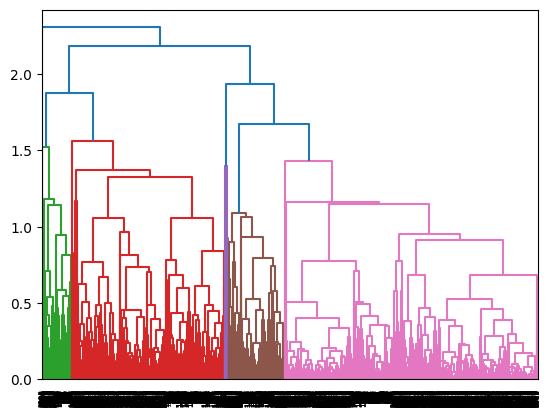

In [36]:
# create dendrogram

#sch.set_link_color_palette(['m', 'c', 'y'])
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
#methods : 'single','complete','centroid','average'

In [37]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [38]:
y_hc = hc.fit_predict(df_norm)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

In [39]:
east_df['h_clusterid'] = y_hc
east_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,2


In [40]:
east_df.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,97133.898029,240.205982,2.668933,1.007478,1.018355,28810.523453,15.596193,802.263086,2.452073,4631.008838,1.000000
1,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
2,59995.096308,88.516453,1.712681,1.000401,1.008828,10219.196629,9.099920,227.148475,0.653291,3824.315811,0.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


KMeans- from the above tabel it clear that it has k-cluster=8 and based on this it is divided into 4 cluster.

Hirearchichal- Similar to kmean it is divided into 4 cluster that is 0,1,2,3 but cluster point are different as compared to KMeans

DBSCAN- Based on the data its eps and min_sample model has predicted on the basis of 0 that is noise points, 1 that is core points, -1 that is border points and at last 2 thats is others.